In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from gradientDescent import *
from featureNormalize import *
from normalEqn import *

In [2]:
data=pd.read_csv('data_multi-linear.txt',sep=',',header=None)
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [3]:
data.describe()

,0,1,2
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


# VISUALIZE DATA

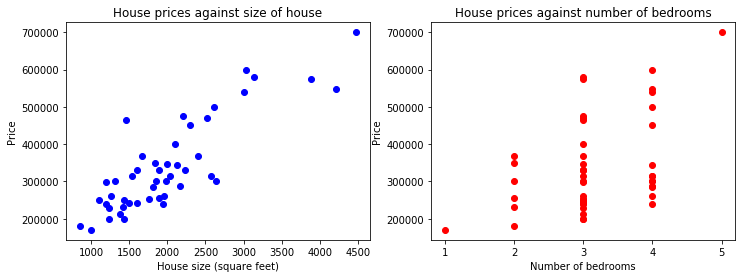

In [4]:
X,y=data.values[:,:2],data.values[:,2][:,np.newaxis]
m=data.values[:,-1].size
fig,ax=plt.subplots(figsize=(12,4),nrows=1,ncols=2)
ax[0].plot(X[:,0],y,'bo')
ax[0].set_xlabel('House size (square feet)')
ax[0].set_ylabel('Price')
ax[0].set_title('House prices against size of house')
ax[1].plot(X[:,1],y,'ro')
ax[1].set_xlabel('Number of bedrooms')
ax[1].set_ylabel('Price')
ax[1].set_title('House prices against number of bedrooms')
ax[1].set_xticks(range(1,6))

# FEATURE NORMALIZATION

In [5]:
# Scale features and set them to zero mean
X_norm,mu,sigma=featureNormalize(X)
# Add intercept term to X
X_norm=np.column_stack((np.ones(m),X_norm))

# GRADIENT DESCENT

## TEST GRADIENT DESCENT

Theta computed from gradient descent:
[340412.65957447],
[109447.79558639],
[-6578.3539709]


Text(0.5, 1.0, 'Cost function using Gradient Descent')

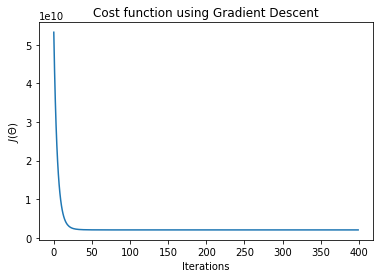

In [6]:
# Run Gradient Descent
alpha=0.1
num_iters=400
theta=np.zeros((3,1))
theta, J_history=gradientDescent(X_norm,y,theta,alpha,num_iters)
# Display gradient descent's result
print('Theta computed from gradient descent:\n{},\n{},\n{}'.format(theta[0],theta[1],theta[2]))
# Plot the convergence graph
plt.plot(J_history)
plt.xlabel('Iterations')
plt.ylabel('$J(\Theta)$')
plt.title('Cost function using Gradient Descent')

In [7]:
# Estimate the price of a 1650 sq-ft, 3 br house
price=np.asscalar(np.concatenate((1,(np.array([1650,3])-mu)/sigma),axis=None)@theta)
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n $',price)

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $ 293081.4645291686


## SELECT LEARNING RATE

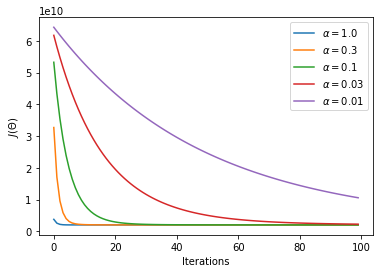

In [8]:
alpha=np.array([1,0.3,0.1,0.03,0.01])
for i in range(alpha.size):
    _,J_history=gradientDescent(X_norm,y,np.zeros((3,1)),alpha[i],100)
    plt.plot(J_history,label=r'$\alpha={}$'.format(alpha[i]))
ax=plt.gca()
handles,labels=ax.get_legend_handles_labels()
plt.legend(handles,labels)
plt.xlabel('Iterations')
plt.ylabel('$J(\Theta)$')
plt.savefig('cost-function-and-learning-rate.png')

# NORMAL EQUATION

In [9]:
# Add intercept term to X
X_ones=np.column_stack((np.ones(m),X))
# Calculate the parameters from the normal equation
theta=normalEqn(X_ones,y)
# Display normal equation's result
print('Theta computed from the normal equations:\n{}\n{}\n{}'.format(theta[0],theta[1],theta[2]))

Theta computed from the normal equations:
[89597.90954361]
[139.21067402]
[-8738.01911255]


In [10]:
# Estimate the price of a 1650 sq-ft, 3 br house
price=np.asscalar(np.array([1,1650,3])@theta)
print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations):\n ${}'.format(price))

Predicted price of a 1650 sq-ft, 3 br house (using normal equations):
 $293081.4643349892


# ADVANCED OPTIMIZATION ALGORITHMS

## TRAIN SET PERFORMANCE

In [11]:
linReg=LinearRegression()
linReg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
print('Theta computed by sklearn LinearRegression: [%.2f, %.2f, %.2f]' % (linReg.intercept_,linReg.coef_[0][0],linReg.coef_[0][1]))
print('Predicted price of a 1650 sq-ft, 3 br house: $%.2f' % (linReg.predict(np.array([[1650,3]]))))

Theta computed by sklearn LinearRegression: [89597.91, 139.21, -8738.02]
Predicted price of a 1650 sq-ft, 3 br house: $293081.46


In [13]:
r2_score(y,linReg.predict(X))

0.7329450180289141

## TEST SET PERFORMANCE

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5)

In [15]:
linRegSplit=LinearRegression()
linRegSplit.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
print('Theta computed by sklearn LinearRegression: [%.2f, %.2f, %.2f]' % (linRegSplit.intercept_,linRegSplit.coef_[0][0],linRegSplit.coef_[0][1]))
print('Predicted price of a 1650 sq-ft, 3 br house: $%.2f' % (linRegSplit.predict(np.array([[1650,3]]))))

Theta computed by sklearn LinearRegression: [80600.73, 145.58, -9595.93]
Predicted price of a 1650 sq-ft, 3 br house: $292018.64


In [17]:
y_pred=linRegSplit.predict(X_test)
r2_score(y_test,y_pred)

0.5634768192354875